IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       1.0 -0.035554   0.027477    1.465293   0.169302         83.0   
1      66.0 -0.055574   0.025789   -0.877162   0.169751          0.0   
2      50.0 -0.129602   0.032395   -0.702055   0.221610          0.0   
3      83.0 -0.015786   0.017492    3.584369   0.133045          0.0   
4       9.0 -0.014257   0.006134   -0.313065   0.079502         86.0   
...     ...       ...        ...         ...        ...          ...   
1344   13.0 -0.027534   0.018403    4.277618   0.138242         86.0   
1345   15.0 -0.021563   0.009735    2.528592   0.100862         58.0   
1346   40.0 -0.055745   0.027183   -0.964832   0.173842          0.0   
1347   54.0  0.002146   0.007276   -0.354393   0.085221          0.0   
1348   98.0 -0.054516   0.016342   -0.541786   0.138844          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            82.0    8.222915    4.483560 -0.018301  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.035554   0.027477    1.465293   0.169302         83.0         82.0   
1    -0.055574   0.025789   -0.877162   0.169751          0.0         77.0   
2    -0.129602   0.032395   -0.702055   0.221610          0.0        126.0   
3    -0.015786   0.017492    3.584369   0.133045          0.0        116.0   
4    -0.014257   0.006134   -0.313065   0.079502         86.0         80.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.027534   0.018403    4.277618   0.138242         86.0          0.0   
1345 -0.021563   0.009735    2.528592   0.100862         58.0         78.0   
1346 -0.055745   0.027183   -0.964832   0.173842          0.0         77.0   
1347  0.002146   0.007276   -0.354393   0.085221          0.0        109.0   
1348 -0.054516   0.016342   -0.541786   0.138844          0.0        123.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.056104   0.027261   -0.963934   0.174179          0.0         81.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   19.451347    2.115155  -0.01608   0.007801  ...       6612.534625   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          4.79653          0.500476          -0.568933          4.848287   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340                97.0                94.0          20.020782   

     amp2(Curr(ESC_5))  Guasto  
340           10.46142       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.035554   0.027477    1.465293   0.169302         83.0         82.0   
1    -0.055574   0.025789   -0.877162   0.169751          0.0         77.0   
2    -0.129602   0.032395   -0.702055   0.221610          0.0        126.0   
3    -0.015786   0.017492    3.584369   0.133045          0.0        116.0   
4    -0.014257   0.006134   -0.313065   0.079502         86.0         80.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.027534   0.018403    4.277618   0.138242         86.0          0.0   
1345 -0.021563   0.009735    2.528592   0.100862         58.0         78.0   
1346 -0.055745   0.027183   -0.964832   0.173842          0.0         77.0   
1347  0.002146   0.007276   -0.354393   0.085221          0.0        109.0   
1348 -0.054516   0.016342   -0.541786   0.138844          0.0        123.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.035554   0.027477    1.465293   0.169302    83.000000    82.000000   
1    -0.055574   0.025789   -0.877162   0.169751     0.000000    77.000000   
2    -0.129602   0.032395   -0.702055   0.221610     0.000000   126.000000   
3    -0.015786   0.017492    3.584369   0.133045     0.000000   116.000000   
4    -0.014257   0.006134   -0.313065   0.079502    86.000000    80.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.024936   0.009756    2.388179   0.101744    81.554302    61.777151   
1616  0.006309   0.007564   -0.458162   0.087084     0.000000    84.117866   
1617  0.006476   0.007568   -0.458685   0.087118     0.000000    83.333611   
1618 -0.121512   0.038459   -0.385610   0.230490    78.215821    57.892090   
1619 -0.008157   0.011725    2.358361   0.108449    60.000000    68.583991   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=70)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=70, score_func=<function f_regression at 0x000002BA37405120>)
[ True  True  True False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True  True  True  True  True  True
 False False False False False False False False False False  True  True
 False  True  True  True False False False False False  True False  True
  True  True  True  True False False False False False False False False
  True False False  True  True  True  True  True  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False  True False False False  True  True False False  True
 False False False False  True  True False False  True  True False False
  True False  True False  True  True False False False False  True False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.294430
28          freq1(AccX)  3.436175
12          freq1(GyrY)  3.112095
11            RMS(GyrY)  2.822848
153    kurt(RPM(ESC_5))  2.696693
93    freq2(RPM(ESC_1))  2.686305
92    freq1(RPM(ESC_1))  2.680150
9             var(GyrY)  2.670566
14           amp1(GyrY)  2.461874
159    var(Curr(ESC_5))  2.251246
104      <>(RPM(ESC_2))  1.897530
8              <>(GyrY)  1.809157
78     amp1(RPM(ESC_0))  1.774679
152     var(RPM(ESC_5))  1.765943
107     RMS(RPM(ESC_2))  1.602876
22           amp1(GyrZ)  1.494824
32             <>(AccY)  1.443500
62          amp1(Pitch)  1.220665
76    freq1(RPM(ESC_0))  1.140811
30           amp1(AccX)  1.112018
17            var(GyrZ)  1.025869
80      <>(Curr(ESC_0))  0.994960
77    freq2(RPM(ESC_0))  0.993452
19            RMS(GyrZ)  0.963156
4           freq1(GyrX)  0.891734
57           var(Pitch)  0.889289
81     var(Curr(ESC_0))  0.722362
156    amp1(RPM(ESC_5))  0.704150
97     var(Cur

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 52, 53, 54, 55, 56, 58, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 100, 101, 102, 105, 106, 108, 109, 110, 111, 114, 115, 118, 119, 121, 123, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  \
0    -0.035554   0.027477    1.465293    83.000000 -0.018301   0.008335   
1    -0.055574   0.025789   -0.877162     0.000000 -0.017663   0.007880   
2    -0.129602   0.032395   -0.702055     0.000000  0.000144   0.005546   
3    -0.015786   0.017492    3.584369     0.000000 -0.013865   0.013125   
4    -0.014257   0.006134   -0.313065    86.000000  0.042854   0.013177   
...        ...        ...         ...          ...       ...        ...   
1615 -0.024936   0.009756    2.388179    81.554302 -0.008420   0.006255   
1616  0.006309   0.007564   -0.458162     0.000000  0.017674   0.005759   
1617  0.006476   0.007568   -0.458685     0.000000  0.017803   0.005765   
1618 -0.121512   0.038459   -0.385610    78.215821  0.040754   0.010405   
1619 -0.008157   0.011725    2.358361    60.000000  0.062523   0.011069   

      RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  ...  kurt(Curr(ESC_4))  \
0      0.092986    

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  \
340 -0.056104   0.027261   -0.963934          0.0  -0.01608   0.007801   

     RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  ...  kurt(Curr(ESC_4))  \
340   0.089665        110.0    6.266058    4.781293  ...          -0.588091   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  \
340    745609.492566         -0.114142      12411.162933       6612.534625   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  RMS(Curr(ESC_5))  freq1(Curr(ESC_5))  \
340          4.79653          0.500476          4.848287                97.0   

     freq2(Curr(ESC_5))  
340                94.0  

[1 rows x 70 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  \
0    -0.035554   0.027477    1.465293    83.000000 -0.018301   0.006960   
1    -0.055574   0.025789   -0.877162     0.000000 -0.017663   0.043928   
2    -0.129602   0.032395   -0.702055     0.000000  0.000144   0.008039   
3    -0.015786   0.017492    3.584369     0.000000 -0.013865   0.004772   
4    -0.014257   0.006134   -0.313065    86.000000  0.042854   0.008696   
...        ...        ...         ...          ...       ...        ...   
1615 -0.024936   0.009756    2.388179    81.554302 -0.008420   0.004681   
1616  0.006309   0.007564   -0.458162     0.000000  0.017674   0.005906   
1617  0.006476   0.007568   -0.458685     0.000000  0.017803   0.005911   
1618 -0.121512   0.038459   -0.385610    78.215821  0.040754   0.004683   
1619 -0.008157   0.011725    2.358361    60.000000  0.062523   0.004824   

      kurt(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  ...  var(Curr(ESC_1))  \
0      -0.965500   0.16

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  \
340 -0.056104   0.027261   -0.963934          0.0  -0.01608   0.027671   

     kurt(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  ...  var(Curr(ESC_1))  \
340    1.159139   0.195182    0.889998 -0.246965  ...           0.29935   

     RMS(Curr(ESC_1))  amp2(Curr(ESC_1))  var(Curr(ESC_2))  \
340          2.621111           6.106965           0.43651   

     freq1(Curr(ESC_2))  kurt(RPM(ESC_3))  kurt(Curr(ESC_3))  \
340                78.0          -0.43875          -0.943089   

     kurt(RPM(ESC_4))  amp2(RPM(ESC_5))  freq1(Curr(ESC_5))  
340          0.559403       6612.534625                97.0  

[1 rows x 28 columns]


In [ ]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 28)
(324, 28)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.80769231 0.77606178 0.83783784 0.81081081 0.84942085]
Accuracy: 0.87 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64


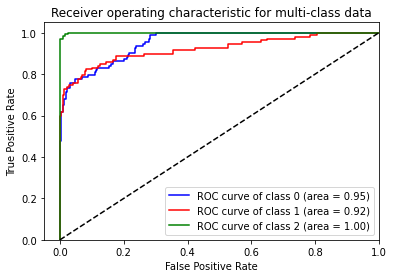

----------------------------------------------------
Cross-Validation: [0.69230769 0.67953668 0.63320463 0.62162162 0.6988417 ]
Accuracy: 0.67 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64


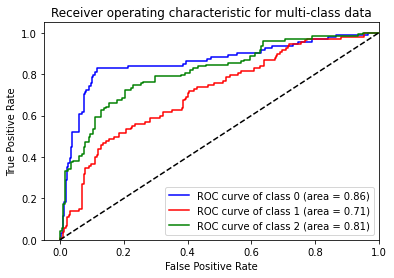

----------------------------------------------------
Cross-Validation: [0.76538462 0.7992278  0.88803089 0.59073359 0.84942085]
Accuracy: 0.9 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


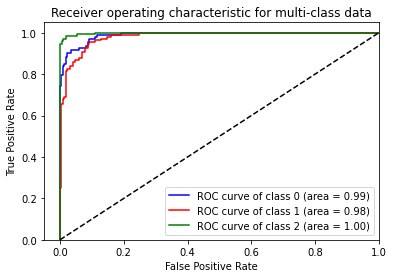

----------------------------------------------------
Cross-Validation: [0.6        0.73359073 0.42084942 0.6988417  0.51737452]
Accuracy: 0.58 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


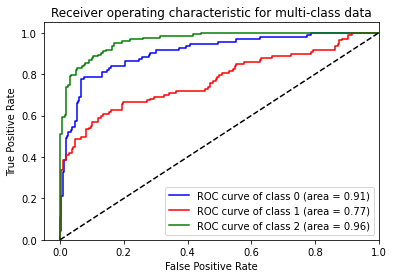

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

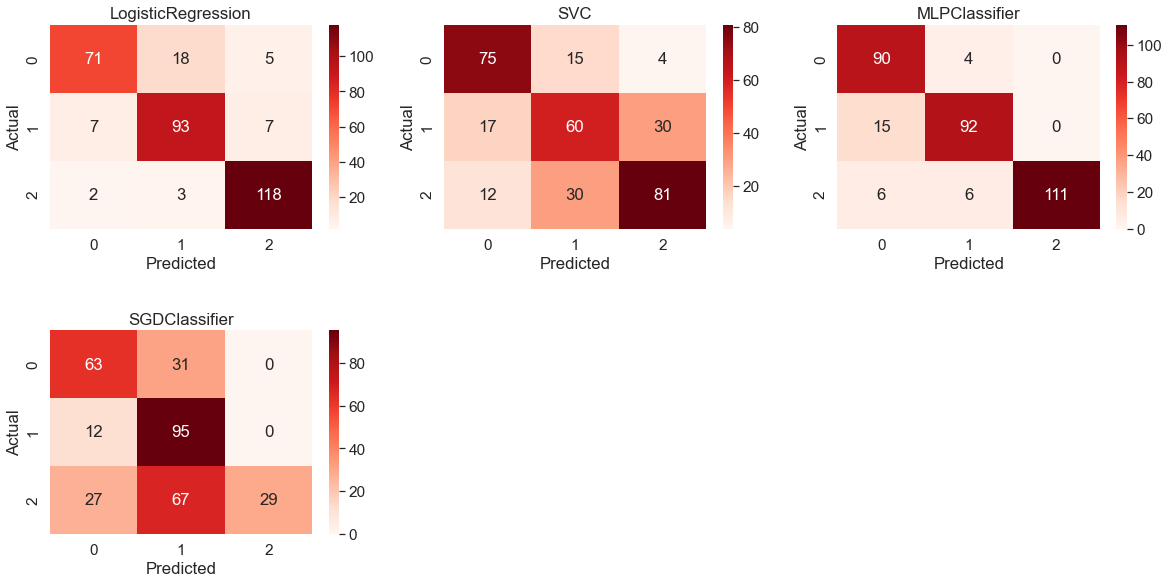

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Score

Text(0.5, 1.0, 'Cross validation scores')

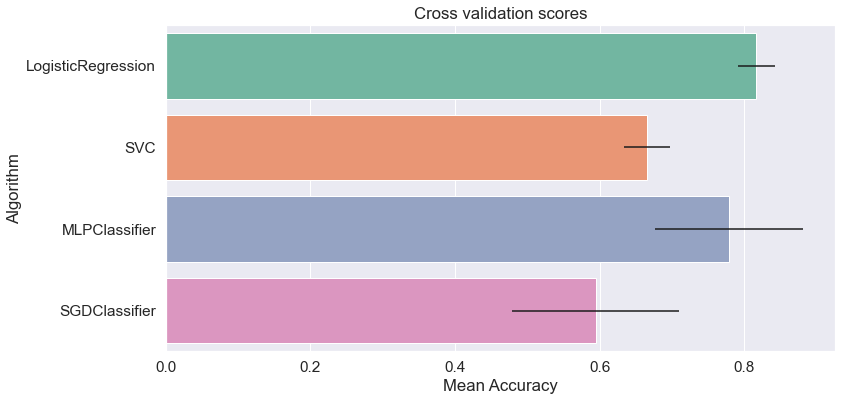

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        94
           1       0.82      0.87      0.84       107
           2       0.91      0.96      0.93       123

    accuracy                           0.87       324
   macro avg       0.87      0.86      0.86       324
weighted avg       0.87      0.87      0.87       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        94
           1       0.57      0.56      0.57       107
           2       0.70      0.66      0.68       123

    accuracy                           0.67       324
   macro avg       0.67      0.67      0.67       324
weighted avg       0.67      0.67      0.67       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        94
           1       0.90